In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)

## 2. Load Data

In [5]:
# Load original data
df = pd.read_csv('../data/raw/ecommerce_data.csv')

print("="*70)
print("DATASET LOADED")
print("="*70)
print(f"Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

DATASET LOADED
Shape: (5630, 20)

First 5 rows:


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## 3. Target Variable Analysis

TARGET VARIABLE: CHURN DISTRIBUTION

Churn = 0 (Not Churned): 4,682 (83.16%)
Churn = 1 (Churned):     948 (16.84%)


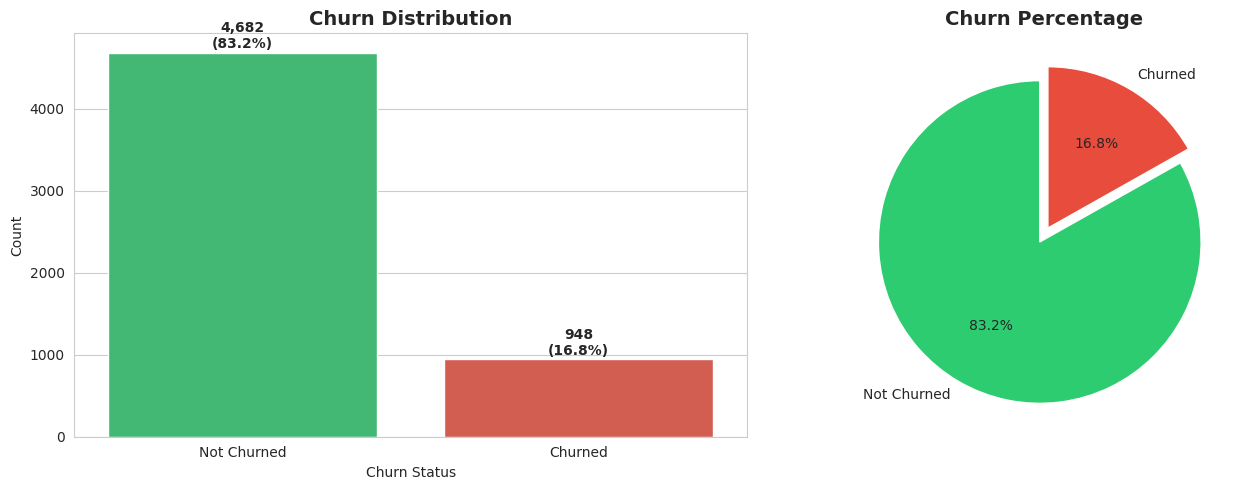

In [6]:
print("="*70)
print("TARGET VARIABLE: CHURN DISTRIBUTION")
print("="*70)

churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print(f"\nChurn = 0 (Not Churned): {churn_counts[0]:,} ({churn_pct[0]:.2f}%)")
print(f"Churn = 1 (Churned):     {churn_counts[1]:,} ({churn_pct[1]:.2f}%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
sns.countplot(data=df, x='Churn', palette=['#2ecc71', '#e74c3c'], ax=axes[0])
axes[0].set_title('Churn Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Not Churned', 'Churned'])

for i, v in enumerate(churn_counts):
    axes[0].text(i, v + 50, f"{v:,}\n({churn_pct[i]:.1f}%)", ha='center', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Churn Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Numerical Features Distribution

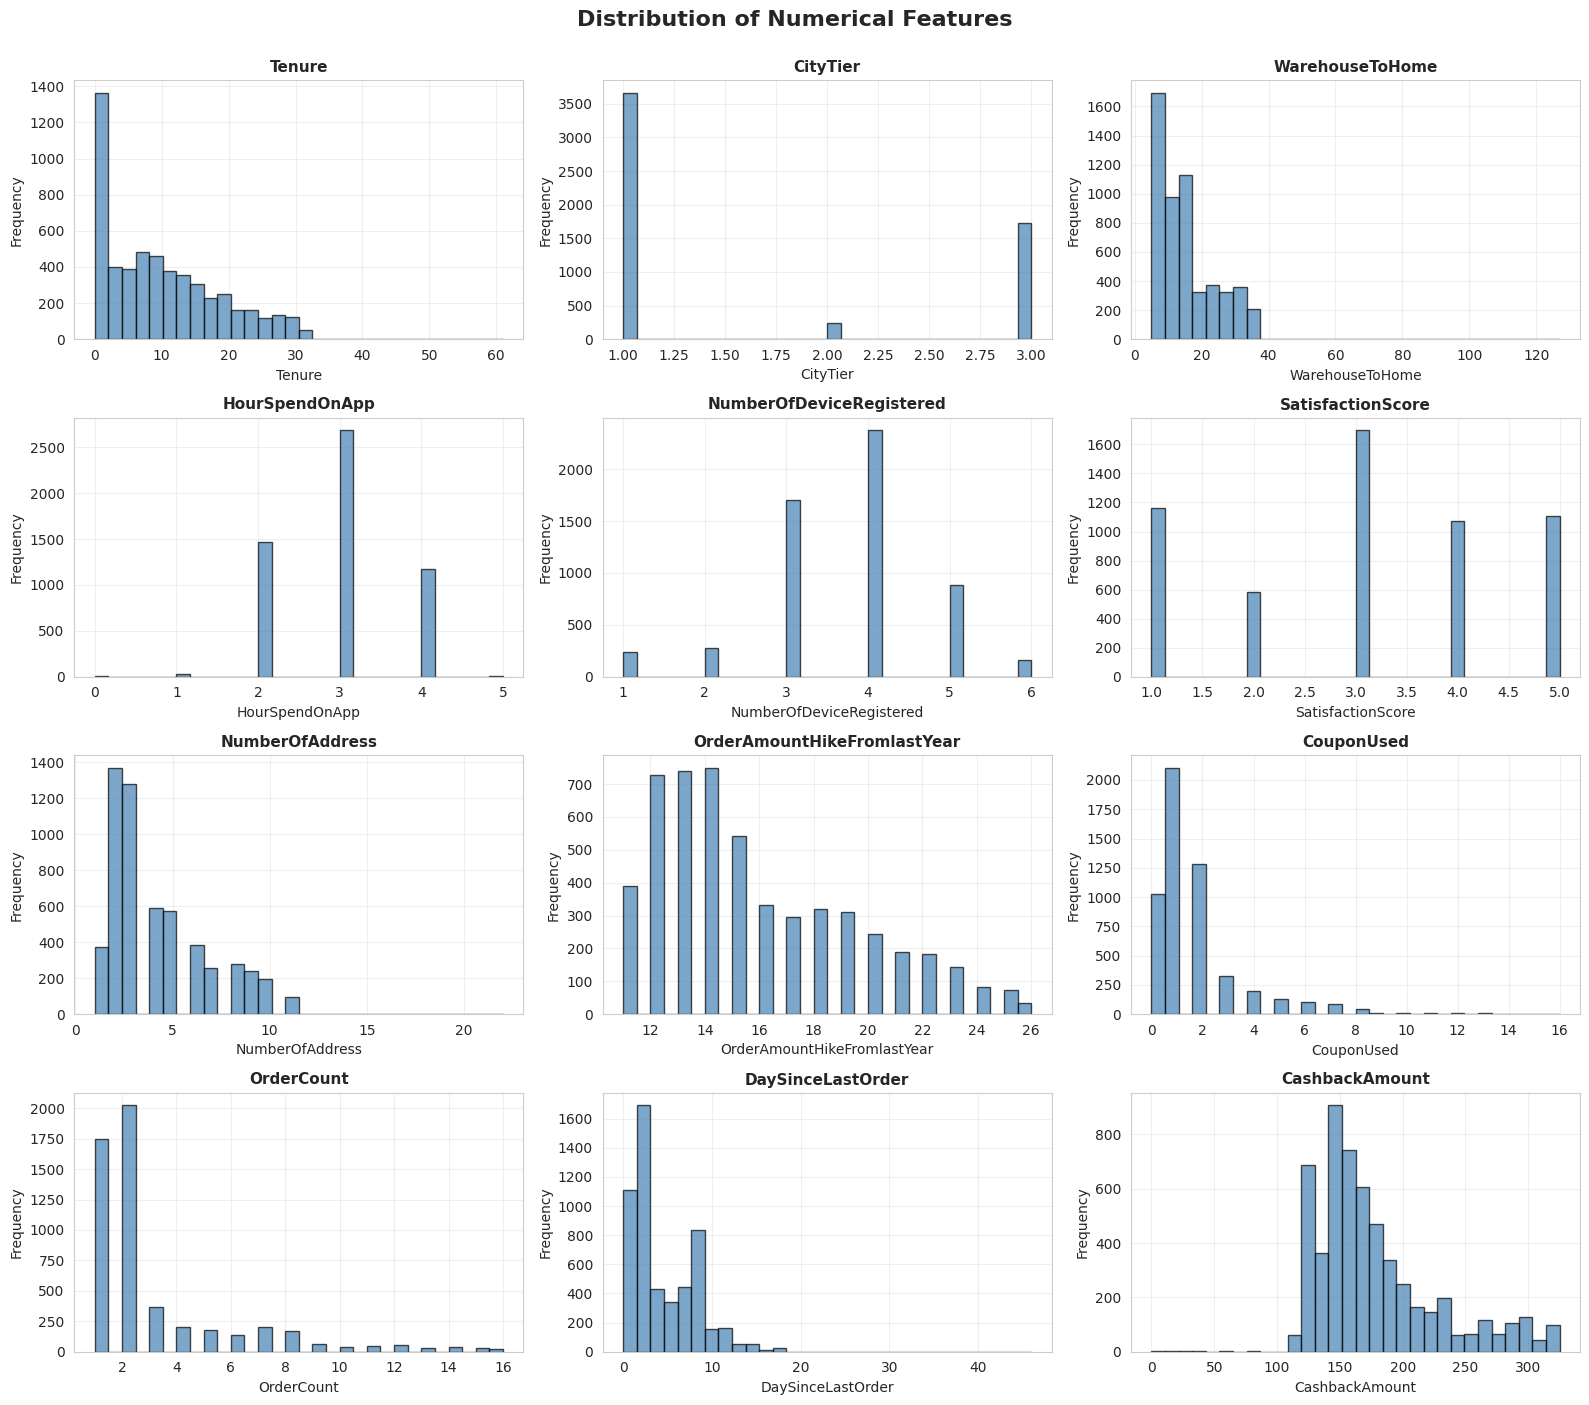

In [7]:
numerical_features = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 
                      'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
                      'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 
                      'DaySinceLastOrder', 'CashbackAmount']

fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 5. Numerical Features vs Churn

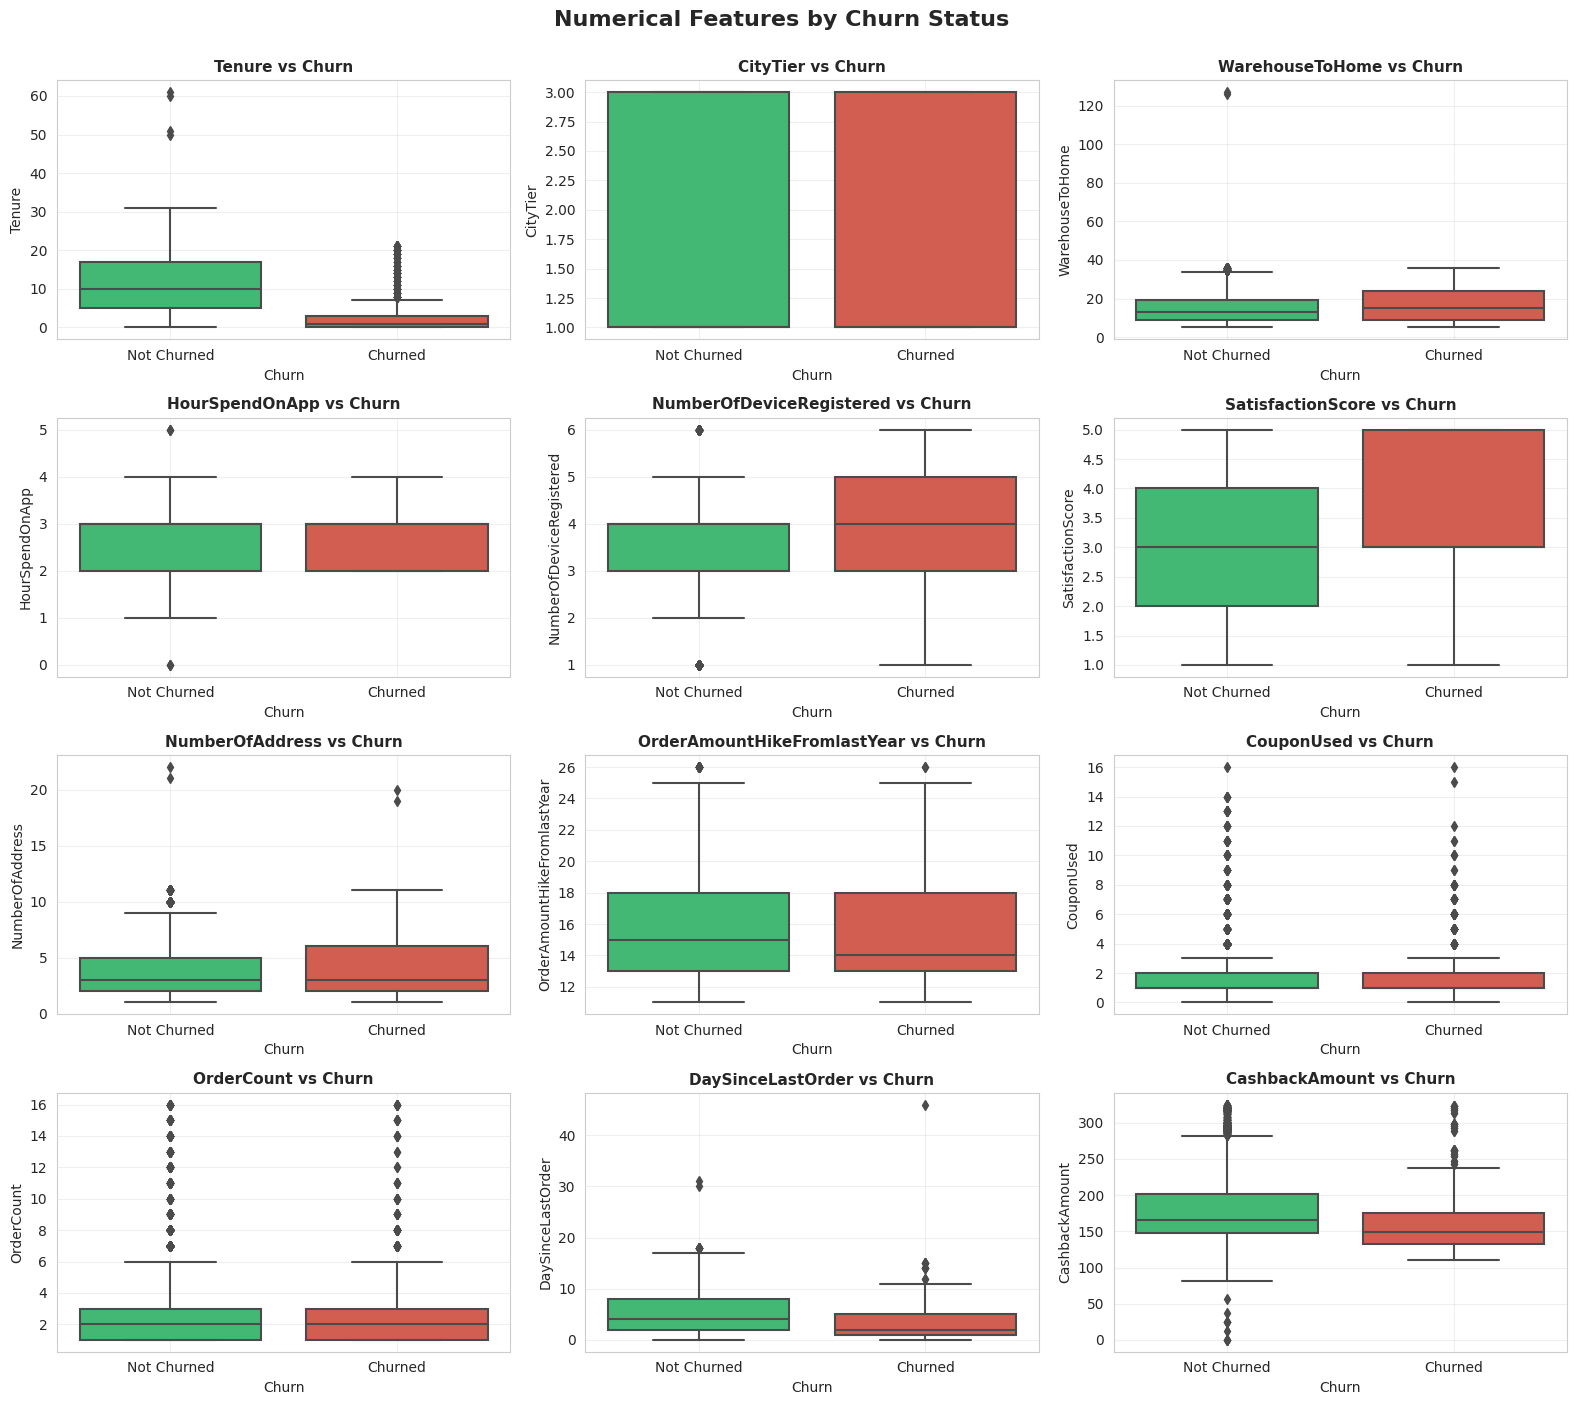

In [8]:
# Box plots: Numerical features by Churn status
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    sns.boxplot(data=df, x='Churn', y=col, palette=['#2ecc71', '#e74c3c'], ax=axes[idx])
    axes[idx].set_title(f'{col} vs Churn', fontsize=11, fontweight='bold')
    axes[idx].set_xticklabels(['Not Churned', 'Churned'])
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Numerical Features by Churn Status', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 6. Categorical Features Analysis

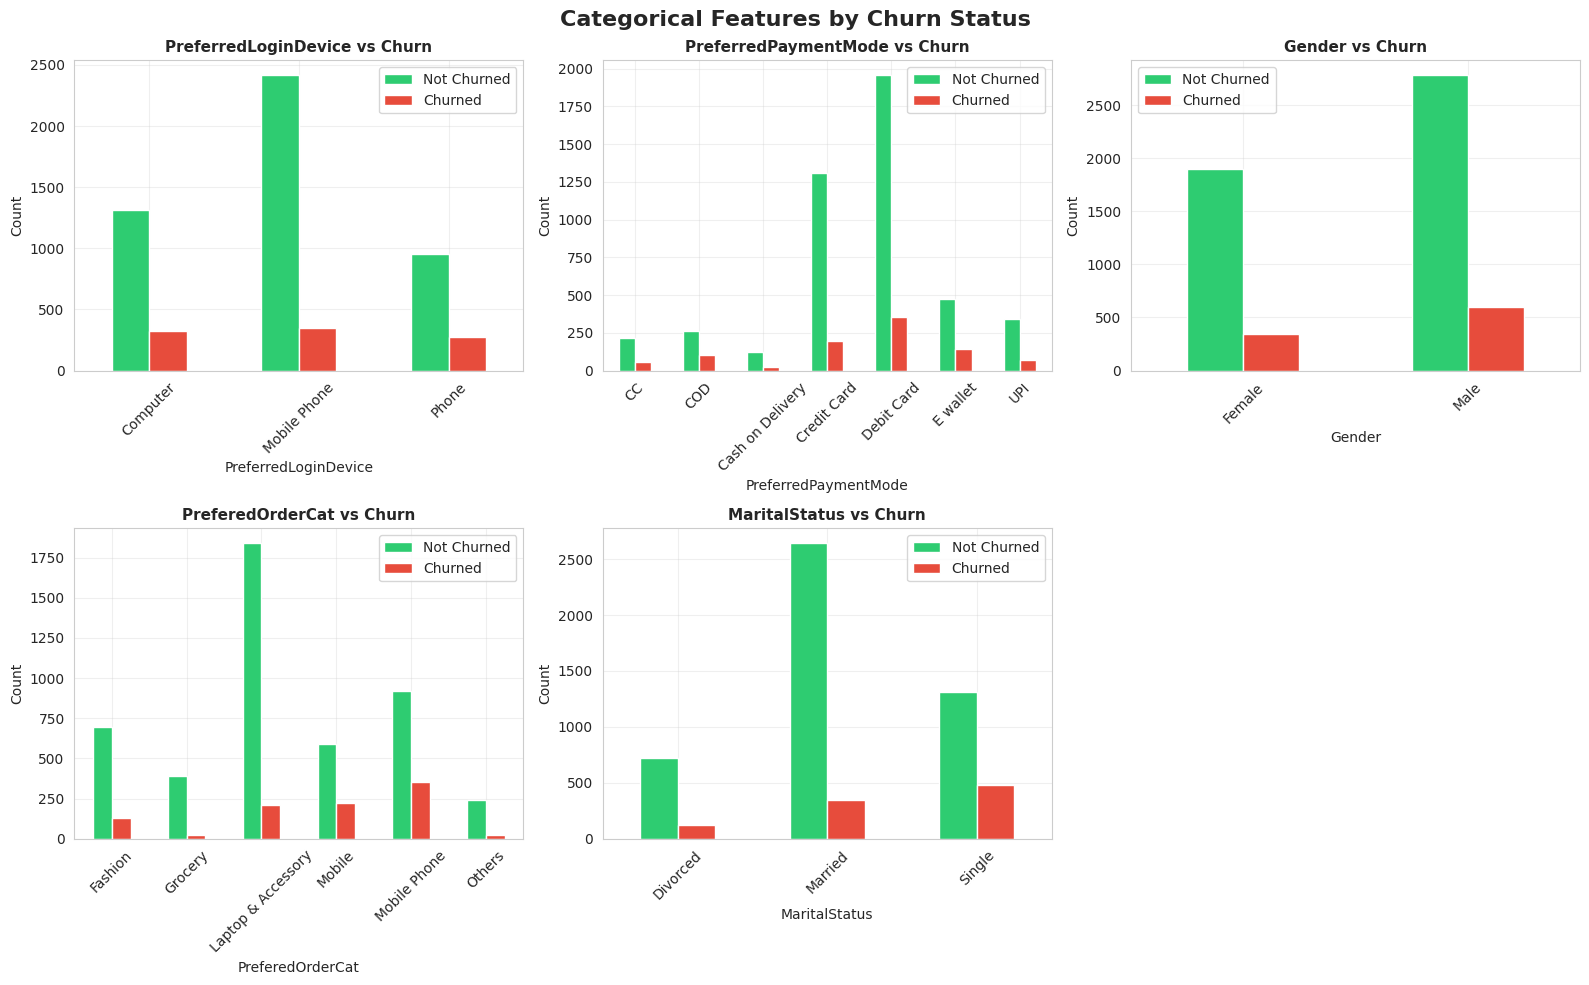

In [9]:
categorical_features = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 
                        'PreferedOrderCat', 'MaritalStatus']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    # Count by churn status
    churn_counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    churn_counts.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{col} vs Churn', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].legend(['Not Churned', 'Churned'])
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[5])

plt.suptitle('Categorical Features by Churn Status', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 7. Correlation Analysis

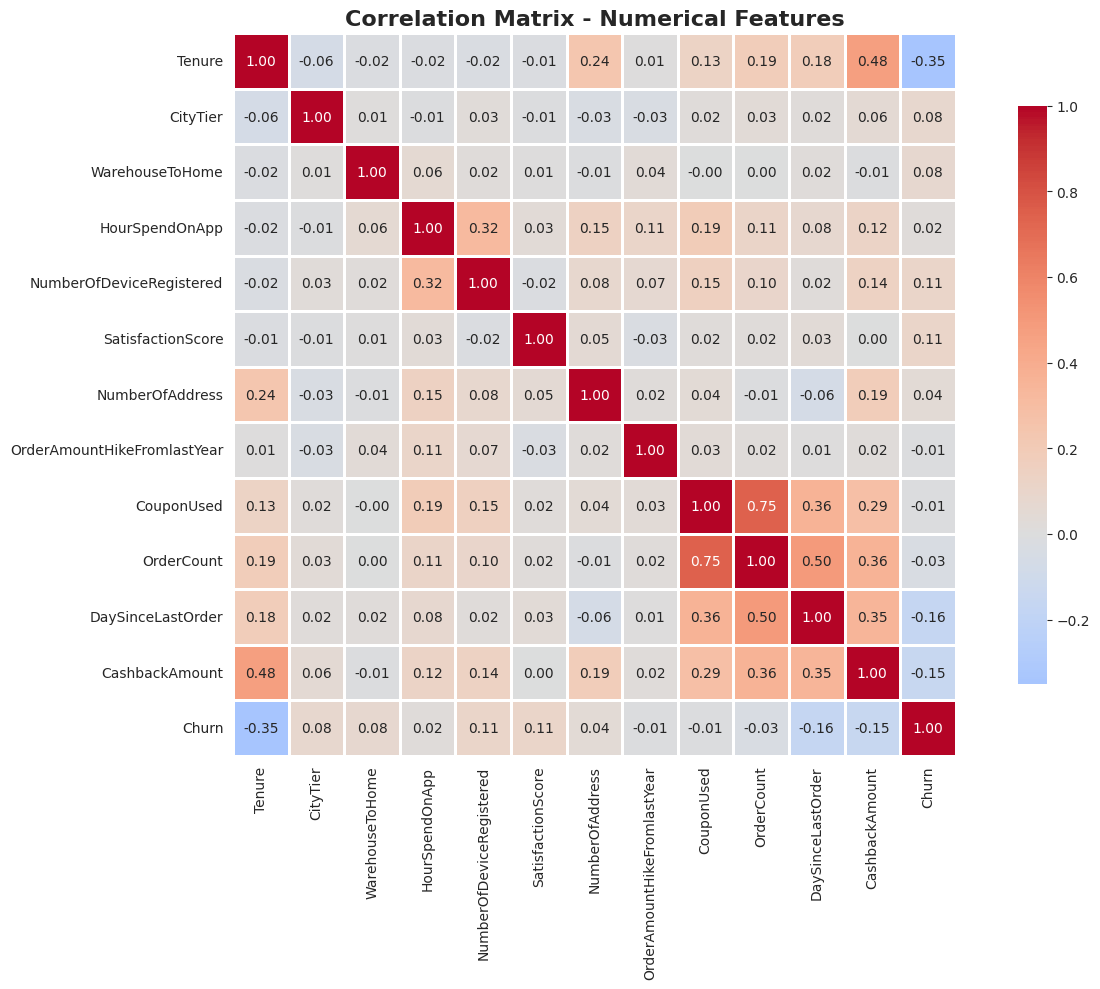


TOP CORRELATIONS WITH CHURN
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
HourSpendOnApp                 0.018675
CouponUsed                    -0.008264
OrderAmountHikeFromlastYear   -0.010058
OrderCount                    -0.028697
CashbackAmount                -0.154118
DaySinceLastOrder             -0.160757
Tenure                        -0.349408
Name: Churn, dtype: float64


In [10]:
# Correlation matrix
numerical_df = df[numerical_features + ['Churn']].copy()
corr_matrix = numerical_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with Churn
churn_corr = corr_matrix['Churn'].drop('Churn').sort_values(ascending=False)
print("\n" + "="*70)
print("TOP CORRELATIONS WITH CHURN")
print("="*70)
print(churn_corr)

## 8. Key Insights - Tenure Analysis

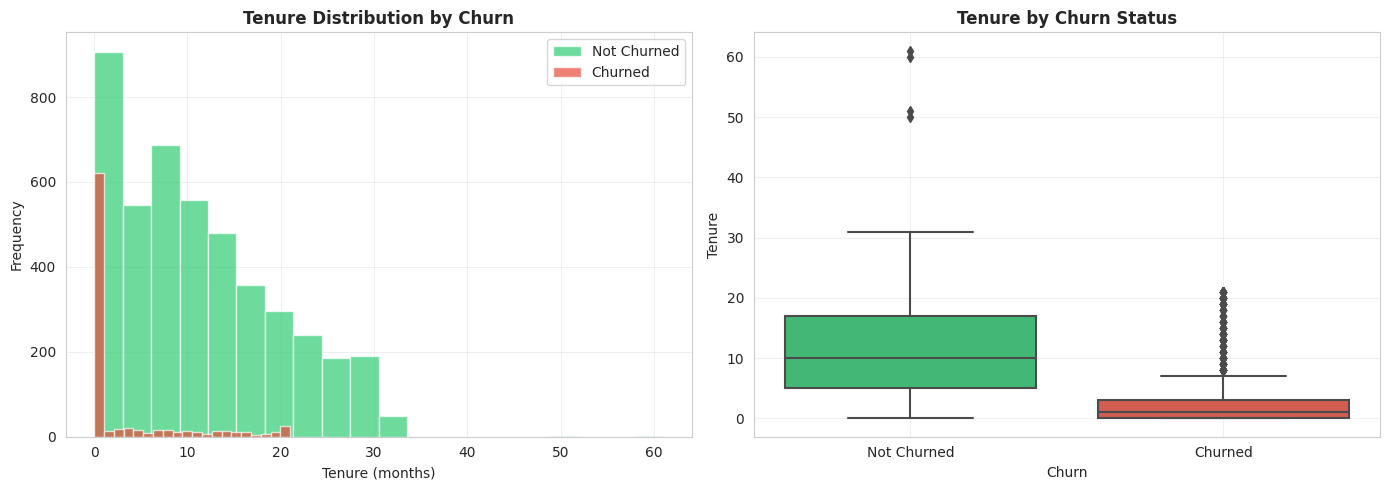


INSIGHT: Tenure Analysis
Average Tenure - Not Churned: 11.50 months
Average Tenure - Churned:     3.38 months


In [18]:
# Tenure distribution by churn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
df[df['Churn']==0]['Tenure'].hist(bins=20, alpha=0.7, label='Not Churned', color='#2ecc71', ax=axes[0])
df[df['Churn']==1]['Tenure'].hist(bins=20, alpha=0.7, label='Churned', color='#e74c3c', ax=axes[0])
axes[0].set_title('Tenure Distribution by Churn', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tenure (months)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
sns.boxplot(data=df, x='Churn', y='Tenure', palette=['#2ecc71', '#e74c3c'], ax=axes[1])
axes[1].set_title('Tenure by Churn Status', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(['Not Churned', 'Churned'])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nINSIGHT: Tenure Analysis")
print(f"Average Tenure - Not Churned: {df[df['Churn']==0]['Tenure'].mean():.2f} months")
print(f"Average Tenure - Churned:     {df[df['Churn']==1]['Tenure'].mean():.2f} months")

## 9. Satisfaction Score Impact

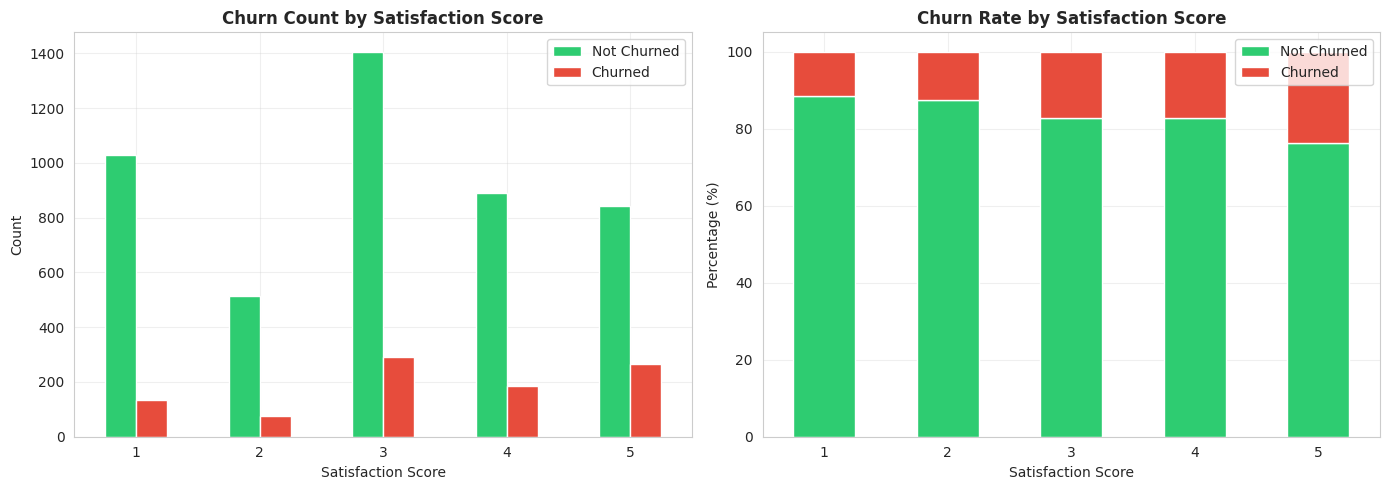


INSIGHT: Satisfaction Score
Score 1: Churn Rate = 11.51%
Score 2: Churn Rate = 12.63%
Score 3: Churn Rate = 17.20%
Score 4: Churn Rate = 17.13%
Score 5: Churn Rate = 23.83%


In [13]:
# Satisfaction score vs churn
satisfaction_churn = df.groupby(['SatisfactionScore', 'Churn']).size().unstack(fill_value=0)
satisfaction_churn_pct = satisfaction_churn.div(satisfaction_churn.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
satisfaction_churn.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Count by Satisfaction Score', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Satisfaction Score')
axes[0].set_ylabel('Count')
axes[0].legend(['Not Churned', 'Churned'])
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(True, alpha=0.3)

# Percentage plot
satisfaction_churn_pct.plot(kind='bar', stacked=True, ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Churn Rate by Satisfaction Score', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Satisfaction Score')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(['Not Churned', 'Churned'])
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nINSIGHT: Satisfaction Score")
for score in sorted(df['SatisfactionScore'].unique()):
    churn_rate = df[df['SatisfactionScore']==score]['Churn'].mean() * 100
    print(f"Score {score}: Churn Rate = {churn_rate:.2f}%")

## 10. Complain Impact

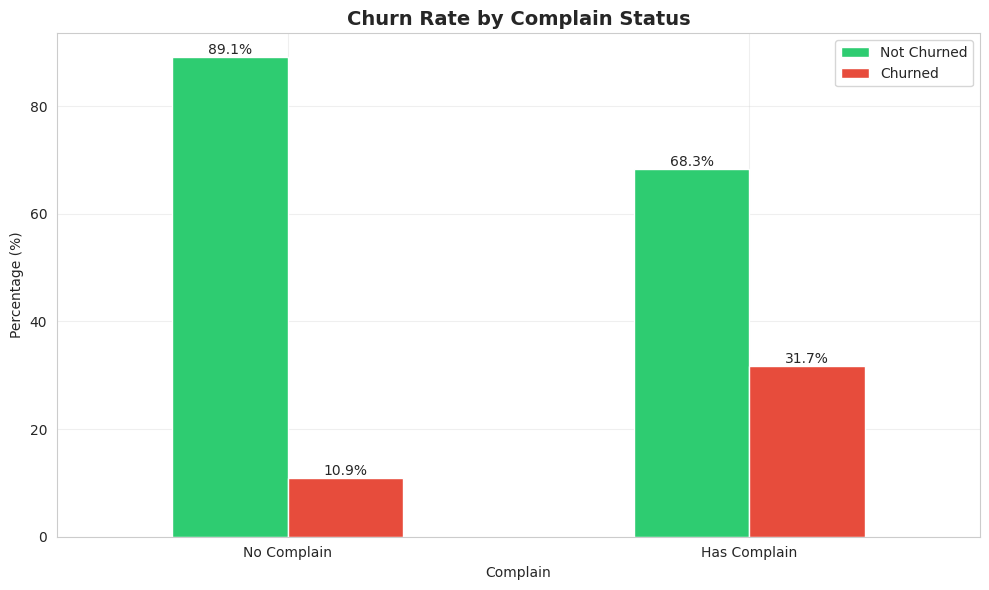


INSIGHT: Complain Impact
Churn Rate - No Complain:  10.93%
Churn Rate - Has Complain: 31.67%


In [15]:
# Complain vs Churn
complain_churn = pd.crosstab(df['Complain'], df['Churn'], normalize='index') * 100

fig, ax = plt.subplots(figsize=(10, 6))
complain_churn.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'])
ax.set_title('Churn Rate by Complain Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Complain')
ax.set_ylabel('Percentage (%)')
ax.set_xticklabels(['No Complain', 'Has Complain'], rotation=0)
ax.legend(['Not Churned', 'Churned'])
ax.grid(True, alpha=0.3)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

print("\nINSIGHT: Complain Impact")
print(f"Churn Rate - No Complain:  {df[df['Complain']==0]['Churn'].mean()*100:.2f}%")
print(f"Churn Rate - Has Complain: {df[df['Complain']==1]['Churn'].mean()*100:.2f}%")

## 11. Summary Statistics by Churn

In [16]:
print("="*70)
print("SUMMARY STATISTICS BY CHURN STATUS")
print("="*70)

for col in numerical_features:
    not_churned = df[df['Churn']==0][col].mean()
    churned = df[df['Churn']==1][col].mean()
    diff = churned - not_churned
    diff_pct = (diff / not_churned * 100) if not_churned != 0 else 0
    
    print(f"\n{col}:")
    print(f"  Not Churned: {not_churned:.2f}")
    print(f"  Churned:     {churned:.2f}")
    print(f"  Difference:  {diff:+.2f} ({diff_pct:+.1f}%)")

SUMMARY STATISTICS BY CHURN STATUS

Tenure:
  Not Churned: 11.50
  Churned:     3.38
  Difference:  -8.12 (-70.6%)

CityTier:
  Not Churned: 1.62
  Churned:     1.83
  Difference:  +0.21 (+12.8%)

WarehouseToHome:
  Not Churned: 15.35
  Churned:     17.13
  Difference:  +1.78 (+11.6%)

HourSpendOnApp:
  Not Churned: 2.93
  Churned:     2.96
  Difference:  +0.04 (+1.2%)

NumberOfDeviceRegistered:
  Not Churned: 3.64
  Churned:     3.93
  Difference:  +0.30 (+8.1%)

SatisfactionScore:
  Not Churned: 3.00
  Churned:     3.39
  Difference:  +0.39 (+13.0%)

NumberOfAddress:
  Not Churned: 4.16
  Churned:     4.47
  Difference:  +0.30 (+7.3%)

OrderAmountHikeFromlastYear:
  Not Churned: 15.72
  Churned:     15.63
  Difference:  -0.10 (-0.6%)

CouponUsed:
  Not Churned: 1.76
  Churned:     1.72
  Difference:  -0.04 (-2.3%)

OrderCount:
  Not Churned: 3.05
  Churned:     2.82
  Difference:  -0.22 (-7.3%)

DaySinceLastOrder:
  Not Churned: 4.81
  Churned:     3.24
  Difference:  -1.57 (-32.7%)
